This notebook contains the EDA, data processing, and model building ideas for project **CO2 Emissions by Cars** which can be accessed at : [GitHub](https://github.com/d0r1h/CO2-Emission-by-Cars)

[Dataset](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Duplicate Data](#duplicate)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Analyze Categorical Variables](#analyze_cat_var)
        - 4.2.4 - [Anaylze Target Variable](#analyze_tar_var)
        - 4.2.5 - [Analyze Relationship Between Target and Independent Variables](#analyze_tar_ind_var)
        - 4.2.6 - [Feature Engineering](#feature_eng)
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Outliers](#out)
        - 5.1.1 - [Discovery of Outliers](#dis_out)
        - 5.1.2 - [Removal of Outliers](#rem_out)
        - 5.1.3 - [Rechecking of Correlation](#rec_cor)
    - 5.2 - [Categorical Encoding](#cat_enc)
6. **[Building Multiple Linear Regression Models](#bui_mlr_mod)**
    - 6.1 - [Multiple Linear Regression - Basic Model](#bas_mod)
    - 6.2 - [Feature Transformation](#fea_tra)
    - 6.3 - [Feature Scaling](#fea_sca)
    - 6.4 - [Multiple Linear Regression - Full Model - After Feature Scaling](#mod_aft_sca)
    - 6.5 - [Assumptions Before Multiple Linear Regression Model](#ass_bef)
        - 6.5.1 - [Assumption #1: If Target Variable is Numeric](#tgt_num)
        - 6.5.2 - [Assumption #2: Presence of Multi-Collinearity](#pre_mul_col)
    - 6.6 - [Multiple Linear Regression - Full Model - After PCA](#mod_pca)
    - 6.7 - [Feature Selection](#fea_sel)
        - 6.7.1 - [Forward Selection](#for_sel)
        - 6.7.2 - [Backward Elimination](#bac_eli)
    - 6.8 - [Multiple Linear Regression - Full Model - After Feature Selection](#mod_fea_sel)
    - 6.9 - [Assumptions After Multiple Linear Regression Model](#ass_aft)
        - 6.9.1 - [Assumption #1: Linear Relationship Between Dependent and Independent Variable](#lr_dep_ind)
        - 6.9.2 - [Assumption #2: Checking for Autocorrelation](#che_aut_cor)
        - 6.9.3 - [Assumption #3: Checking for Heterskedacity](#che_het)
        - 6.9.4 - [Assumption #4: Test for Normality](#tes_nor)
            - 6.9.4.1 - [Q-Q Plot](#qq_plt)
            - 6.9.4.2 - [Shapiro Wilk Test](#sha_wil_tes)
7. **[Model Evaluation](#mod_eva)**
    - 7.1 - [Measures of Variation](#mea_var)
    - 7.2 - [Inferences about Intercept and Slope](#inf_int_slo)
    - 7.3 - [Confidence Interval for Intercept and Slope](#con_int_slo)
    - 7.4 - [Compare Regression Results](#com_reg_res)
8. **[Model Performance](#mod_per)**
    - 8.1 - [Mean Square Error(MSE)](#mse)
    - 8.2 - [Root Mean Squared Error(RMSE)](#rmse)
    - 8.3 - [Mean Absolute Error(MAE)](#mae)
    - 8.4 - [Mean Absolute Percentage Error(MAPE)](#mape)
    - 8.5 - [Resultant Table](#res_tab)
9. **[Model Optimization](#mod_opt)**
    - 9.1 - [Bias](#bias)
    - 9.2 - [Variance](#var)
    - 9.3 - [Model Validation](#mod_val)
      - 9.3.1 - [Cross Validation](#cro_val)
      - 9.3.2 - [Leave One Out Cross Validation(LOOCV)](#loocv)
    - 9.4 - [Gradient Descent](#gra_des)
    - 9.5 - [Regularization](#reg)
      - 9.5.1 - [Ridge Regression Model](#ridge)
      - 9.5.2 - [Lasso Regression Model](#lasso)
      - 9.5.3 - [Elastic Net Regression Model](#ela_net)
      - 9.5.4 - [Grid Search CV](#gri_sea)
10. **[Displaying Score Summary](#dis_sco_sum)**
11. **[Conclusion](#conclu)**

#### **Data Description**


**Model**

1. 4WD/4X4 = Four-wheel drive
2. AWD = All-wheel drive
3. FFV = Flexible-fuel vehicle
4. SWB = Short wheelbase
5. LWB = Long wheelbase
6. EWB = Extended wheelbase

**Transmission**

1. A = Automatic
2. AM = Automated manual
3. AS = Automatic with select shift
4. AV = Continuously variable
5. M = Manual
6. 3 - 10 = Number of gears

**Fuel type**

1. X = Regular gasoline
2. Z = Premium gasoline
3. D = Diesel
4. E = Ethanol (E85)
5. N = Natural gas

**Fuel Consumption**

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg).

**CO2 Emissions**

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
!pip install mlxtend -qq

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor, LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV, cross_val_score, train_test_split

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

# 2. Set Options <a id='set_options'></a>

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [10]:
data = pd.read_csv(r"C:\Users\rahul\Desktop\Project\CO2-Emission-by-Cars-main\final_co2.csv")

data.head()

,Unnamed: 0,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,0,2.000000,4,9.900000,6.700000,8.500000,33,196,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,2.400000,4,11.200000,7.700000,9.600000,29,221,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,3.500000,6,12.700000,9.100000,11.100000,25,255,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,3,3.500000,6,12.100000,8.700000,10.600000,27,244,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,4,3.500000,6,11.900000,7.700000,10.000000,28,230,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5815 entries, 0 to 5814
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5815 non-null   int64  
 1   Engine_Size                5815 non-null   float64
 2   Cylinders                  5815 non-null   int64  
 3   Fuel_Consumption_City      5815 non-null   float64
 4   Fuel_Consumption_Hwy       5815 non-null   float64
 5   Fuel_Consumption_Comb      5815 non-null   float64
 6   Fuel_Consumption_Comb_mpg  5815 non-null   int64  
 7   CO2_Emissions              5815 non-null   int64  
 8   Fuel_Type_E                5815 non-null   int64  
 9   Fuel_Type_X                5815 non-null   int64  
 10  Fuel_Type_Z                5815 non-null   int64  
 11  Transmission_A4            5815 non-null   int64  
 12  Transmission_A5            5815 non-null   int64  
 13  Transmission_A6            5815 non-null   int64

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

**Renaming Columns**

In [12]:
data = data.rename(columns={
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type', 
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emissions'    
})

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [13]:
data.shape

(5815, 43)

In this dataset we have 7384 records across 12 features

### 4.1.2 Data Types <a id='Data_Types'></a>

In [14]:
data.dtypes

Unnamed: 0                     int64
Engine_Size                  float64
Cylinders                      int64
Fuel_Consumption_City        float64
Fuel_Consumption_Hwy         float64
Fuel_Consumption_Comb        float64
Fuel_Consumption_Comb_mpg      int64
CO2_Emissions                  int64
Fuel_Type_E                    int64
Fuel_Type_X                    int64
Fuel_Type_Z                    int64
Transmission_A4                int64
Transmission_A5                int64
Transmission_A6                int64
Transmission_A7                int64
Transmission_A8                int64
Transmission_A9                int64
Transmission_AM5               int64
Transmission_AM6               int64
Transmission_AM7               int64
Transmission_AM8               int64
Transmission_AM9               int64
Transmission_AS10              int64
Transmission_AS4               int64
Transmission_AS5               int64
Transmission_AS6               int64
Transmission_AS7               int64
T

The dataset contains **5 object columns, 3 int column and 4 float columns**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [15]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [16]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Unnamed: 0,0,0.000000
Transmission_AV7,0,0.000000
Transmission_AS5,0,0.000000
Transmission_AS6,0,0.000000
Transmission_AS7,0,0.000000
Transmission_AS8,0,0.000000
Transmission_AS9,0,0.000000
Transmission_AV,0,0.000000
Transmission_AV10,0,0.000000
Transmission_AV6,0,0.000000


There are **no missing values** present in this dataset

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [17]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.reset_index(inplace=True, drop=True)

Now, the dataset has **6281 records and 12 features with no missing and duplicate values**

## 4.2  Data Understanding <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

In [20]:
data.describe(include=np.number)

,Unnamed: 0,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000
mean,2907.000000,3.014153,5.391574,12.232743,8.831212,10.702631,27.665692,246.010490,0.038349,0.501290,0.435082,0.007223,0.012726,0.101806,0.006019,0.056578,0.044540,0.000688,0.014617,0.057266,0.007223,0.000172,0.024248,0.000344,0.004471,0.192949,0.044368,0.168358,0.011178,0.031470,0.001548,0.013929,0.015649,0.005847,0.028891,0.129837,0.013242,0.025795,0.441617,0.083405,0.278074,0.325709,0.112984
std,1678.790239,1.215639,1.517436,2.858833,1.864979,2.379126,6.043588,50.211144,0.192054,0.500041,0.495810,0.084686,0.112098,0.302419,0.077354,0.231054,0.206309,0.026221,0.120026,0.232370,0.084686,0.013114,0.153830,0.018544,0.066723,0.394647,0.205929,0.374216,0.105142,0.174600,0.039314,0.117208,0.124125,0.076248,0.167514,0.336153,0.114318,0.158538,0.496622,0.276517,0.448089,0.468680,0.316600
min,0.000000,0.900000,3.000000,5.600000,4.500000,6.000000,16.000000,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1453.500000,2.000000,4.000000,10.000000,7.400000,8.900000,23.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2907.000000,3.000000,6.000000,11.900000,8.600000,10.400000,27.000000,242.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4360.500000,3.600000,6.000000,14.100000,9.900000,12.300000,32.000000,281.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,5814.000000,6.200000,8.000000,21.300000,14.500000,18.100000,47.000000,407.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

1. The average amount of CO2 emitted from cars is 251 g/km
2. Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway
3. About 75% of the cars have 6 or less cylinders
4. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [23]:
#data.describe(include = object)

1. There are a total of 42 different car companies with 2053 different car models
2. Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3. 4 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4. Most of the cars have AS6 transmission

### 4.2.2 Correlation <a id='correlation'></a>

In [24]:
data_num_features = data.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Unnamed: 0', 'Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb_mpg', 'CO2_Emissions', 'Fuel_Type_E',
       'Fuel_Type_X', 'Fuel_Type_Z', 'Transmission_A4', 'Transmission_A5',
       'Transmission_A6', 'Transmission_A7', 'Transmission_A8',
       'Transmission_A9', 'Transmission_AM5', 'Transmission_AM6',
       'Transmission_AM7', 'Transmission_AM8', 'Transmission_AM9',
       'Transmission_AS10', 'Transmission_AS4', 'Transmission_AS5',
       'Transmission_AS6', 'Transmission_AS7', 'Transmission_AS8',
       'Transmission_AS9', 'Transmission_AV', 'Transmission_AV10',
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7',
       'Make_Type_Luxury', 'Make_Type_Premium', 'Make_Type_Sports',
       'Vehicle_Class_Type_SUV', 'Vehicle_Class_Type_Sedan',
       'Vehicle_Class_Typ

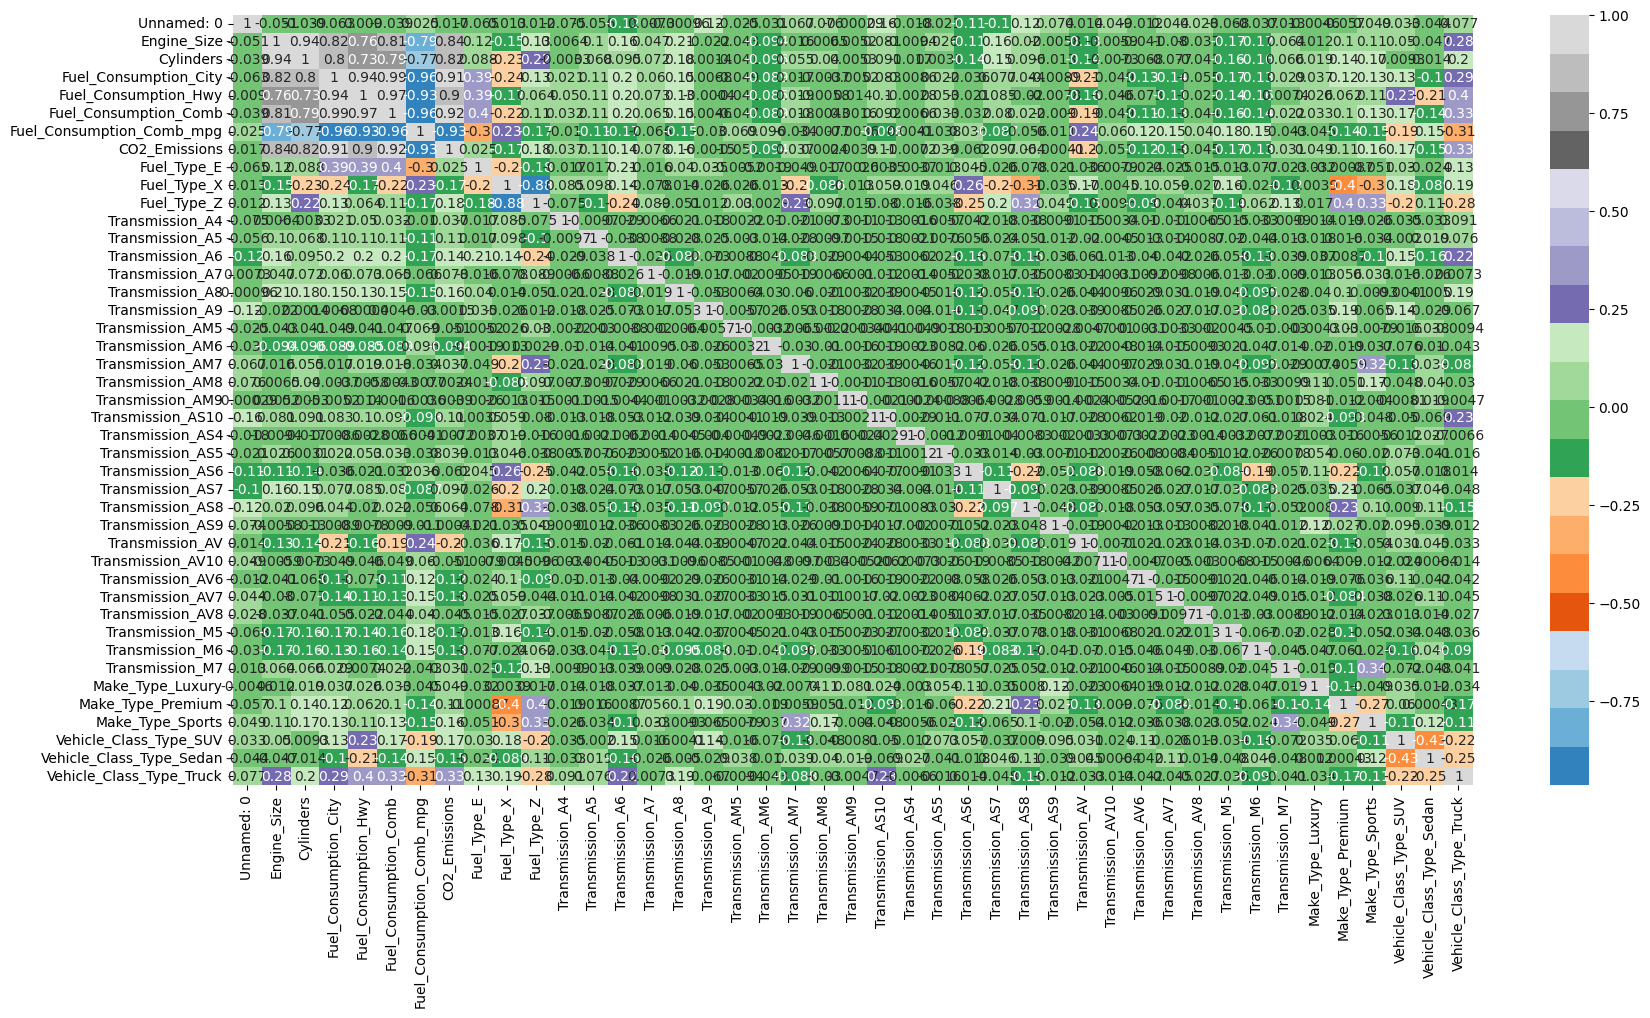

In [25]:
plt.figure(figsize=(20,10))

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

1. Fuel_Consumption_Comb1 has a high negative correaltion(<-0.9) with CO2_Emissions, Fuel_Consumption_Comb and Fuel_Consumption_City
2. CO2_Emissions has high positive correlation(>0.9) with Fuel_Consumption_Comb and Fuel_Consumption_City

### 4.2.3 Analyse Categorical Variables <a id='analyze_cat_var'></a>

In [28]:
data_cat_features = data.select_\dtypes(include='object')
data_cat_features1 = data_cat_features[['Vehicle_Class', 'Transmission', 'Fuel_Type', 'Model','Make']]

SyntaxError: unexpected character after line continuation character (419791014.py, line 1)

NameError: name 'data_cat_features1' is not defined

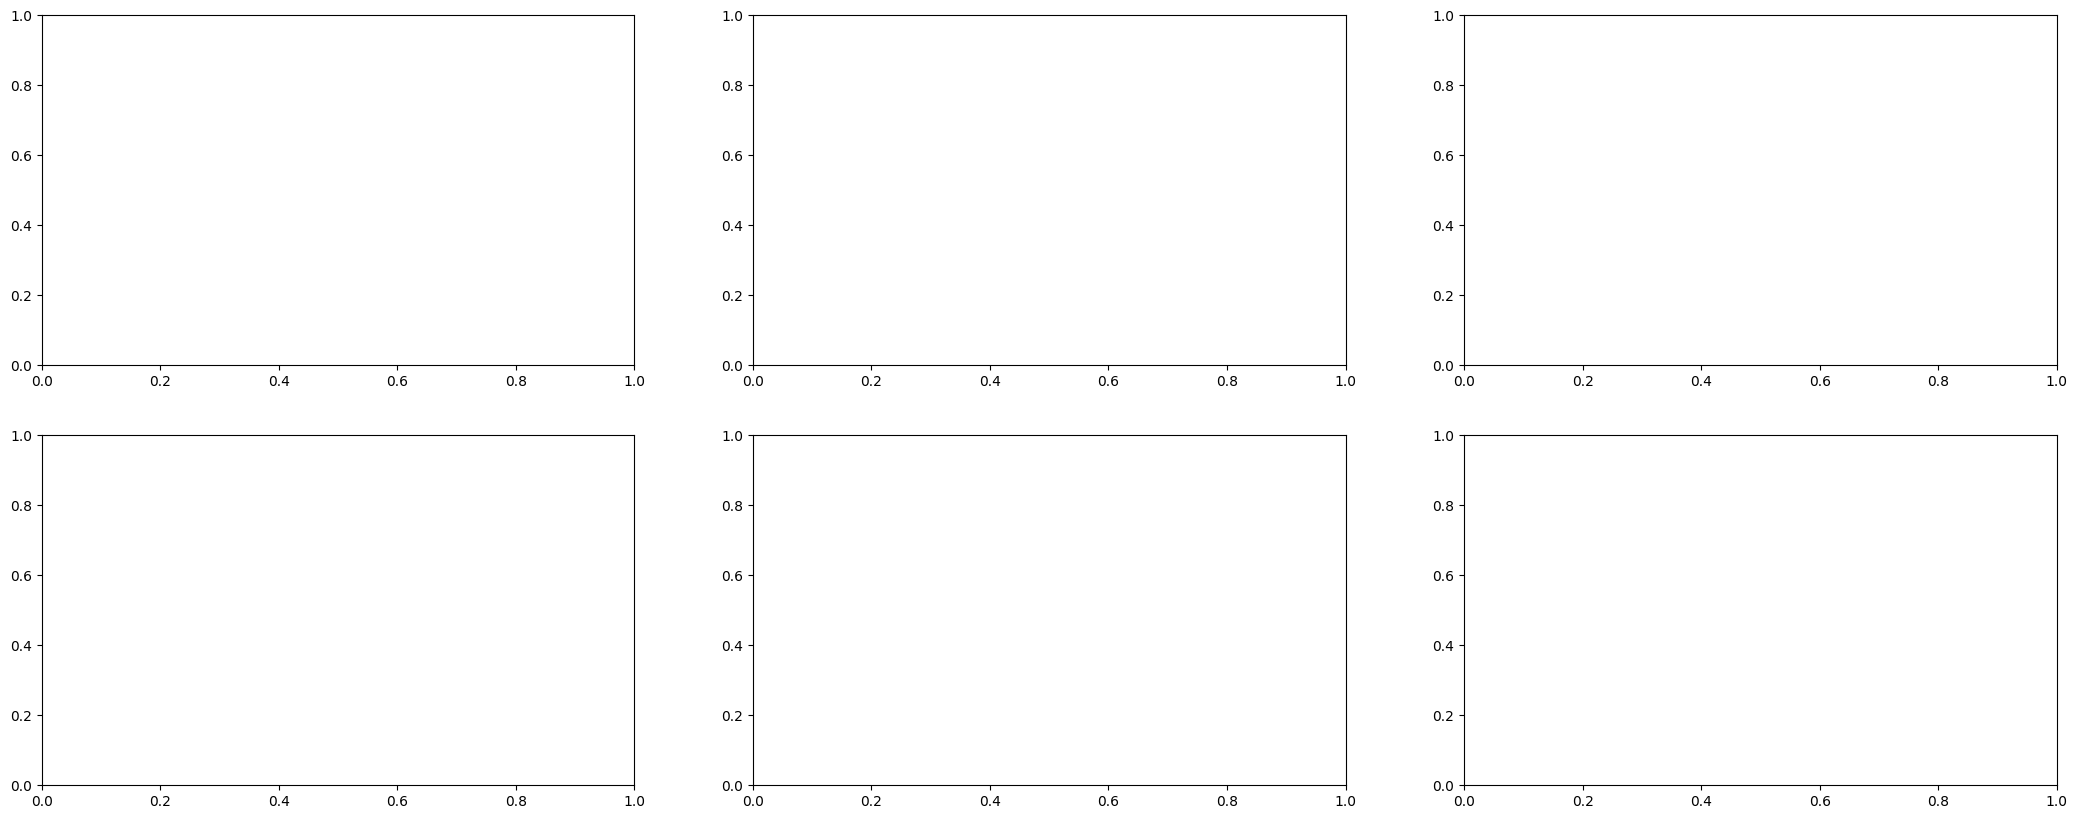

In [27]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10)) 

for variable, subplot in zip(data_cat_features1.columns,ax.flatten()):
    cat_count  = data[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(cat_count10.values,cat_count10.index, alpha=0.8, ax=subplot)
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)
    
fig.delaxes(ax[1][2])

1. Top 10 Make: Most of the cars on Canadian roads are made by Ford
2. Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada
3. Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians
4. Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types
5. Fuel Type: Majority of the cars in Canada use Fuel type X and Z

### 4.2.4 Analyse Target Variable <a id='analyze_tar_var'></a>

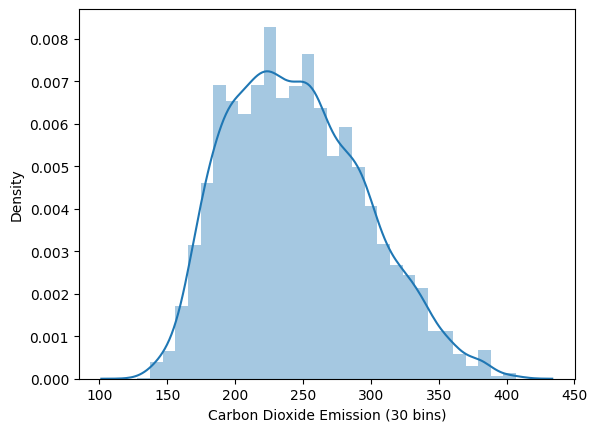

In [29]:
sns.distplot(data['CO2_Emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

From the above histogram, we can see that CO2_Emissions is moderately positive skewed

In [30]:
mean = data['CO2_Emissions'].mean()
mode = data['CO2_Emissions'].mode()
median = data['CO2_Emissions'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 246.0104901117799
Median for CO2 Emission is 242.0
Mode for CO2 Emission is 0    221
1    246
Name: CO2_Emissions, dtype: int64


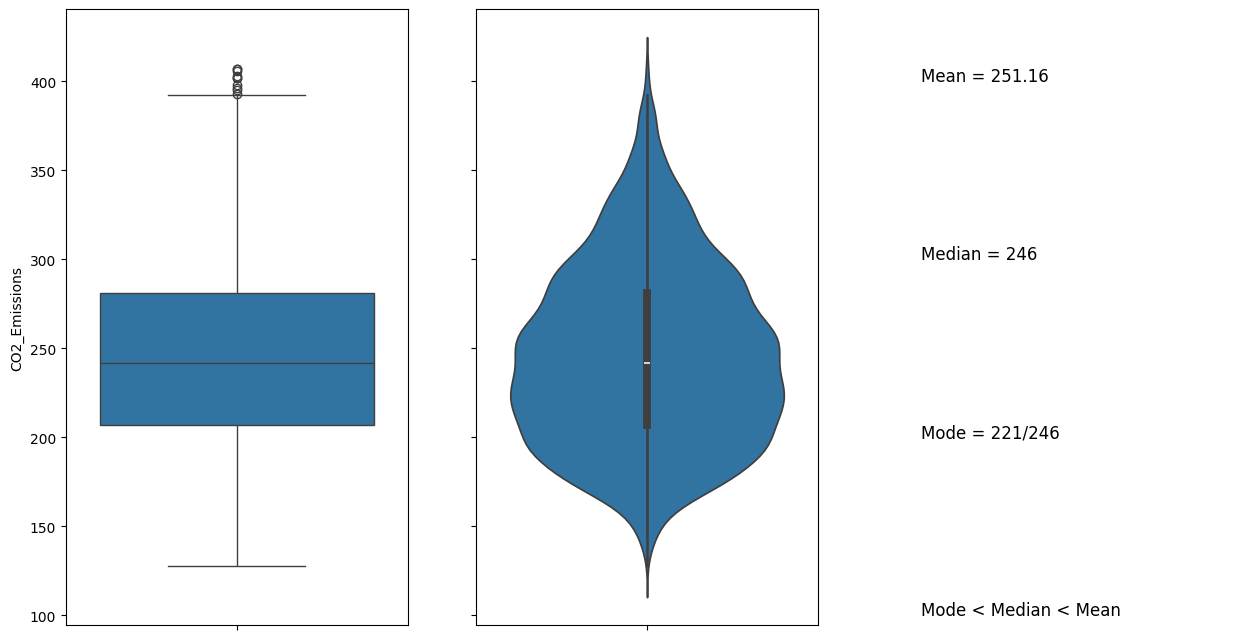

In [31]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sns.boxplot(y=data['CO2_Emissions'], orient="v", ax = axes[0])
sns.violinplot(y=data['CO2_Emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

### 4.2.5 Analyse Relationship between Target and Independent Variables <a id='analyze_tar_ind_var'></a>

In [32]:
make_co2 = data.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('Model')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()

KeyError: 'Make'

NameError: name 'make_co2' is not defined

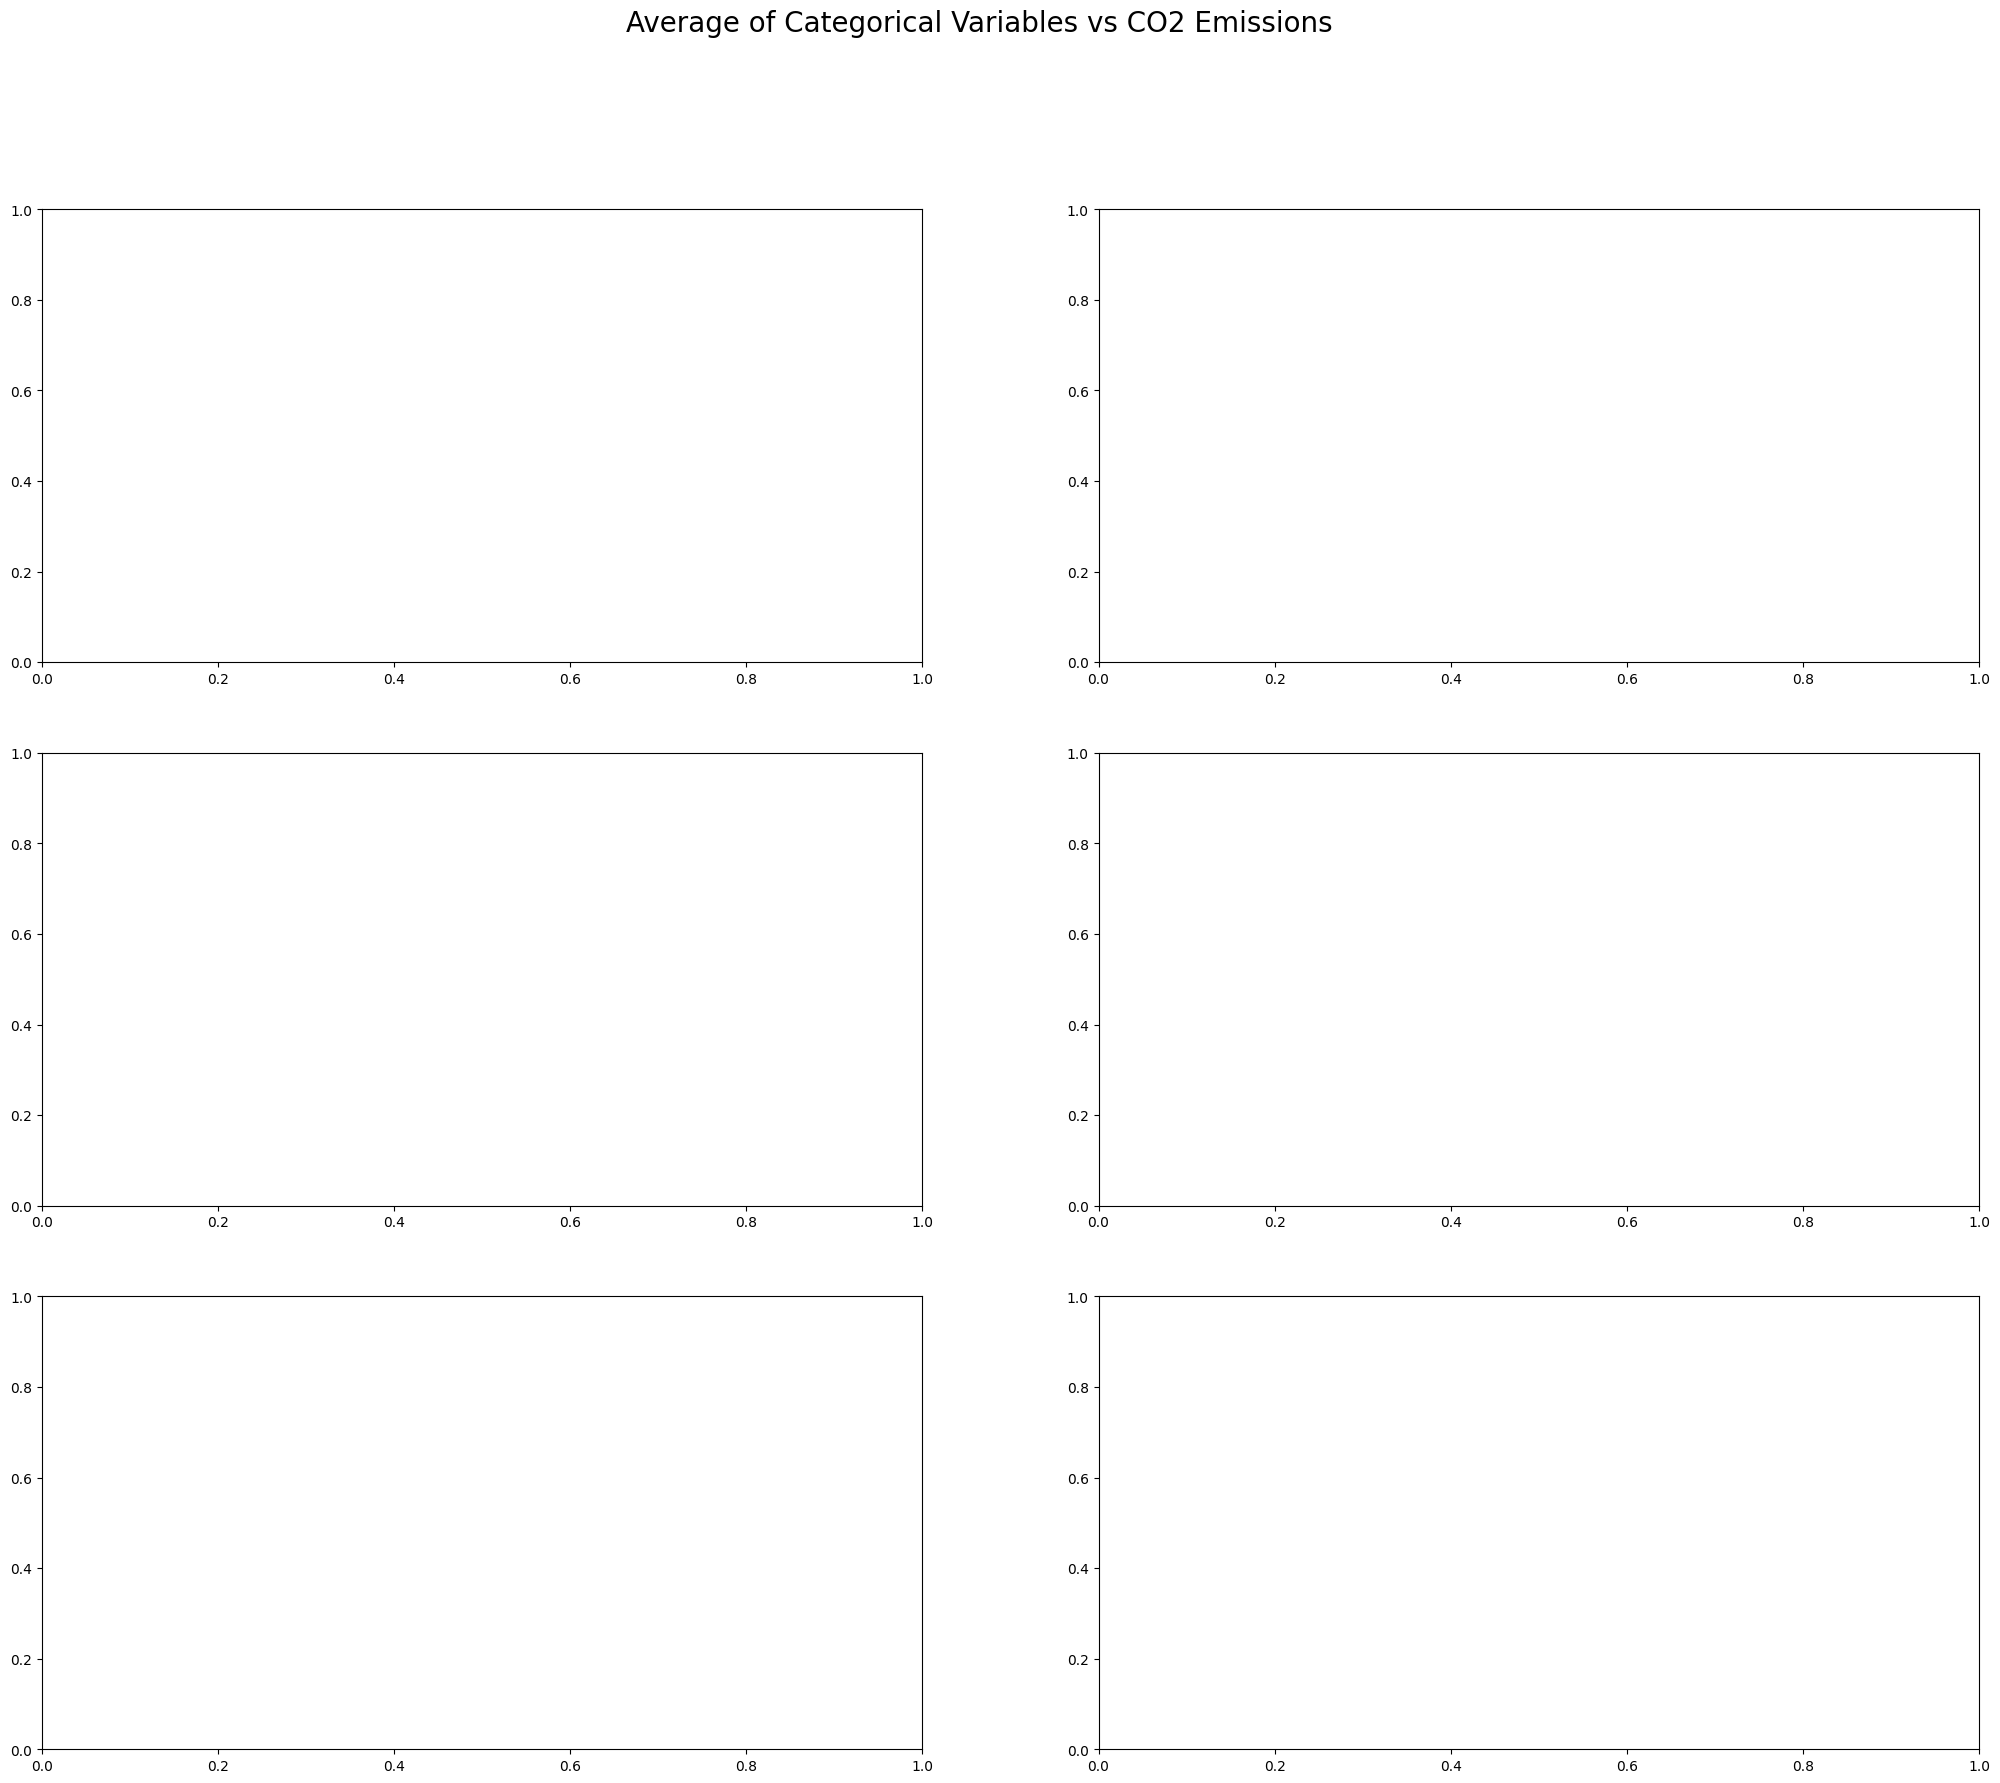

In [33]:
fig, axes = plt.subplots(3,2, figsize=(25,20))

fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index)
axes[0][0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index)
axes[0][1].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[1][0].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[1][1].set_title('CO2 Emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index)
axes[2][0].set_title('CO2 Emissions v/s Model')


fig.delaxes(axes[2][1])
plt.show()

1. CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car
2. CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model
3. CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2
4. CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2
5. CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E are emitting the most CO2

**Relationship between Cylinders and CO2 Emissions**

In [34]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot('CO2_Emissions','Cylinders',data = data,hue='Fuel_Type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

From the above scatter plot we can see that:
1. As the number of cylinders increase, the CO2 emissions increase
2. Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2
3. Fuel Type Z results in more CO2 emissions than the other

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data,kind="reg")
plt.show()

1. Fuel_Consumption_Comb1 shows a negative relation with all the other numerical variables
2. Fuel_Consumption_City and Fuel_Consumption_Hwy are strongly postively related

### 4.2.6 Feature Engineering <a id='feature_eng'></a>

Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
<br>
There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars

In [ ]:
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [ ]:
data.drop(['Make'], inplace=True, axis=1)

data['Make_Type'].unique()

In [ ]:
data['Make_Type'].value_counts()

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Make_Type", y="CO2_Emissions", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that Sports cars and Luxury cars emit more CO2 compared to Premium and General use cars

Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
<br>
There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck

In [ ]:
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [ ]:
data.drop(['Vehicle_Class'], inplace=True,  axis=1)

data['Vehicle_Class_Type'].unique()

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Vehicle_Class_Type", y="CO2_Emissions", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that the bigger the cars are the more CO2 they emit

# 5. Data Preprocessing <a id='data_pre'></a>

In [ ]:
data.drop(['Model'],axis=1,inplace=True)

Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , we have dropped this column

## 5.1 Outliers <a id='out'></a>

### 5.1.1 Discovery of Outliers<a id='dis_out'></a>

In [ ]:
df_num_features=data.select_dtypes(include=np.number)

**Identifying outliers using IQR**

In [ ]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

**Visualizing outliers using Boxplots**

In [ ]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

### 5.1.2 Removal of Outliers<a id='rem_out'></a>

**Checking the normality of numeric features**

In [ ]:
stat, p_value = shapiro(df_num_features)

print('Test statistic:', stat)
print('P-Value:', p_value)

Since the numeric features are not normal we are removing the outliers using IQR method

In [ ]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)

### 5.1.3 Re-checking Correlation<a id='rec_cor'></a>

In [ ]:
data_num_features = data.select_dtypes(include=np.number)

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

There has been a slight change with respect to the correlation between numeric values

## 5.2 Categorical Encoding<a id='cat_enc'></a>

In [ ]:
df_dummies = pd.get_dummies(data = data[["Fuel_Type","Transmission","Make_Type","Vehicle_Class_Type"]], drop_first = True)

df_num_features=data.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [ ]:
df_comb.head()

# 6. Multiple Linear Regression Models<a id='bui_mlr_mod'></a>

In [ ]:
X = df_comb.drop(['CO2_Emissions'], axis=1)
y = df_comb['CO2_Emissions']

## 6.1 Multiple Linear Regression - Basic Model<a id='bas_mod'></a>

In [ ]:
X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

1. 99.5% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
3. The Condition Number is 1.00e+16 which suggests that there is severe mutli-collinearity
4. The features taken into consideration are of different scales

## 6.2 Feature Transformation<a id='fea_tra'></a>

In [ ]:
df_num_features.skew()

Since the skewness is relatively low, there is no need to perform any further transformations to reduce skewness

## 6.3 Feature Scaling<a id='fea_sca'></a>

In [ ]:
for col in df_num_features.columns:
    print("Column ", col, " :", stats.shapiro(df_num_features[col]))

Since none of the numerical features are normally distributed (p-value<0.05) , we will perform Min-Max normalisation to scale the data

In [ ]:
df_num_features.drop('CO2_Emissions',axis=1,inplace=True)

In [ ]:
mms = MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfx = pd.DataFrame(mms.fit_transform(df_num_features), columns = ['Engine_Size','Cylinders','Fuel_Consumption_City',
                                                                'Fuel_Consumption_Hwy','Fuel_Consumption_Comb','Fuel_Consumption_Comb1'])

In [ ]:
df = pd.concat([dfx, df_dummies], axis = 1)
df.head()

## 6.4 Multiple Linear Regression -  After Feature Scaling<a id='mod_aft_sca'></a>

In [ ]:
X = df.copy()
X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


MLR_model2 = sm.OLS(y_train, X_train).fit()
MLR_model2.summary()

1. 99.5% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
3. The Condition Number is 1.24e+16 which suggests that there is severe mutli-collinearity

## 6.5 Assumptions Before Multiple Linear Regression Model<a id="ass_bef"></a>

### 6.5.1 Assumption #1: If Target Variable is Numeric<a id="tgt_num"></a>

In [ ]:
target = df_comb['CO2_Emissions']
target.dtype

### 6.5.2 Assumption #2: Presence of Multi-Collinearity<a id="pre_mul_col"></a>

In [ ]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_num_features.values, i) for i in range(df_num_features.shape[1])]
vif["Features"] = df_num_features.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

Since all the features except Fuel_Consumption_Comb1 have a VIF value greater than 10 we cannot proceed with VIF method else we will lose all our features. Hence , we will proceed with PCA

In [ ]:
sklearn_pca = PCA()
pcafit = sklearn_pca.fit(df)

pcafit.explained_variance_

In [ ]:
pcafit.components_

In [ ]:
plt.plot(np.cumsum(pcafit.explained_variance_ratio_))
plt.locator_params(axis="x", nbins=len(pcafit.explained_variance_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As you can see from the above graph, 28 components describe almost 98% of variance in features

In [ ]:
df_pca = sklearn_pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['pca0','pca1','pca2','pca3','pca4','pca5',
                                       'pca6','pca7','pca8','pca9','pca10','pca11',
                                       'pca12','pca13','pca14','pca15','pca16',
                                       'pca17','pca18','pca19','pca20','pca21','pca22',
                                       'pca23','pca24','pca25','pca26','pca27','pca28',
                                       'pca29','pca30','pca31','pca32','pca33',
                                       'pca34','pca35','pca36','pca37','pca38','pca39',
                                       'pca40','pca41'])

df_pca.head()

## 6.6 Multiple Linear Regression - After PCA<a id="mod_pca"></a>

In [ ]:
df_pca = sm.add_constant(df_pca)

X = df_pca[['const','pca0','pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model_pca = sm.OLS(y_train, X_train).fit()
MLR_model_pca.summary()

1. 99.3% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.053 and indicates that there is no auto-correlation
3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.7 Feature Selection<a id="fea_sel"></a>

### 6.7.1 Forward Selection<a id="for_sel"></a>

In [ ]:
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features ='best', forward=True,
                     verbose=0, scoring='r2')

sfs_forward = linreg_forward.fit(X_train, y_train)

In [ ]:
print('Features selected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

### 6.7.2 Backward Elimination<a id="bac_eli"></a>

In [ ]:
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features ='best', forward = False,
                     verbose = 0, scoring = 'r2')

sfs_backward = linreg_backward.fit(X_train, y_train)

In [ ]:
print('Features selected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

print('\nR-Squared: ', sfs_backward.k_score_)

Obtained similar results as that of Forward Selection where all features except and pca_22 have been retained for the betterment of the model

## 6.8 Multiple Linear Regression - Full Model - After Feature Selection<a id="mod_fea_sel"></a>

In [ ]:
X = df_pca[['const','pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14' ,'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_full_model = sm.OLS(y_train, X_train).fit()
MLR_full_model.summary()

 1. 99.3% of the variation is dependent on variable CO2_Emissions.
 2. The Durbin-Watson test statistic is 2.051 and indicates that there is no auto-correlation
 3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.9 Assumptions After Multiple Linear Regression Model<a id="ass_aft"></a>

### 6.9.1 Assumption #1: Linear Relationship Between Dependent and Independent Variable<a id="lr_dep_ind"></a>

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# 'ax' assigs axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], MLR_full_model.resid , ax=subplot)

plt.show()

 The above plots show no specific pattern, implies that there is a linearity present in the data

### 6.9.2 Assumption #2: Checking for Autocorrelation<a id="che_aut_cor"></a>

From the above summary [Section 6.8](#mod_fea_sel), we can observe that the value obtained from the `Durbin-Watson` test statistic is close to **2** (= 2.012). Thus, we conclude that there is no autocorrelation.

### 6.9.3 Assumption #3: Checking for Heteroskedasticity<a id="che_het"></a>

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [ ]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)
lzip(name, test[2:])

We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 6.9.4 Assumption #4: Tests for Normality<a id="tes_nor"></a>

#### 6.9.4.1 Q-Q Plot<a id="qq_plt"></a>

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_full_model.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

 The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are not close to the diagonal line, we conclude that the residuals do not follow a `normal distribution.`

#### 6.9.4.2 Shapiro Wilk Test<a id="sha_wil_tes"></a>

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [ ]:
stat, p_value = shapiro(MLR_full_model.resid)
print('Test statistic:', stat)
print('P-Value:', p_value)

From the above test we can see that the p-value is 1.365e-38 (less than 0.05), thus we can say that the residuals are not normally distributed.



# 7. Model Evaluation<a id="mod_eva"></a>

## 7.1 Measures of Variation<a id="mea_var"></a>

In [ ]:
y_train_pred = MLR_full_model.predict(X_train) 
y_train_pred.head()

In [ ]:
ssr = np.sum((y_train_pred - y_train.mean())**2)
sse = np.sum((y_train - y_train_pred)**2)
sst = np.sum((y_train - y_train.mean())**2)


print('Sum of Squared Regression:',ssr)
print('Sum of Squared Error:',sse)
print('Sum of Sqaured Total:',sst)
print('Sum of SSR and SSE is:',ssr+sse)

In [ ]:
r_sq =MLR_full_model.rsquared

# print the R-squared value
print('R Squared is:',r_sq)

In [ ]:
see = np.sqrt(sse/(len(X_train) - 2))    
print("The standard error of estimate:",see)

## 7.2 Inferences about Intercept and Slope<a id="inf_int_slo"></a>

In [ ]:
t_intercept =MLR_full_model.params[0] / MLR_full_model.bse[0]
print('t intercept:',t_intercept)

In [ ]:
t_coeff1 =MLR_full_model.params[1] / MLR_full_model.bse[1]
print('t coeff:',t_coeff1)

degrees of freedom = n - 1 = 4070 - 1 = 4069

In [ ]:
pval = stats.t.sf(np.abs(t_intercept), 4069)*2 
print('p val for intercept:',pval)

## 7.3 Confidence Interval for Intercept and Slope<a id="con_int_slo"></a>

t_table_value = 1.9622

In [ ]:
CI_inter_min, CI_inter_max = MLR_full_model.params[0] - (1.9622*MLR_full_model.bse[0]), MLR_full_model.params[0] + (1.9622*MLR_full_model.bse[0])
print('CI for intercept:', [CI_inter_min , CI_inter_max])

In [ ]:
CI_coeff1_min, CI_coeff1_max = MLR_full_model.params[1] - (1.9622*MLR_full_model.bse[1]), MLR_full_model.params[1] + (1.9622*MLR_full_model.bse[1])
print('CI for coeff1:', [CI_coeff1_min, CI_coeff1_max])

## 7.4 Compare Regression Results<a id="com_reg_res"></a>

In [ ]:
r_sq_mlr = MLR_full_model.rsquared
print('r square in regression model:',r_sq_mlr)

The value of R-squared is 0.993. Thus, we conclude that the 99.3% variation in the CO2_Emissions is explained by the model.

In [ ]:
adj_r_sq = MLR_full_model.rsquared_adj
print('Adjusted r square for regression model:',adj_r_sq)

Overall F-Test & p-value of the Model

compute f_value using the below formula 


f_value = (r_sq / k-1)/((1- r_sq)/n-k)

k = number of beta coefficients
n = number of observations

In [ ]:
k = len(X_train.columns)
n = len(X_train)

f_value = (r_sq_mlr / (k - 1))/((1-r_sq_mlr)/(n - k))
print('f value for regression model:',f_value)

degrees of freedom 
dfn = k-1 = 32-1 = 31
dfd = n-k = 4396-32 = 4364

In [ ]:
p_val = stats.f.sf(f_value, dfn = 31, dfd = 4364)
print('p value for regression model:',p_val)

As, the p-value is 0 which is less than 0.05, we accept the alternate hypothesis; i.e. the model is significant.

# 8. Model Performance<a id="mod_per"></a>

In [ ]:
train_pred = MLR_full_model.predict(X_train)
test_pred = MLR_full_model.predict(X_test)

## 8.1 Mean Squared Error (MSE)<a id="mse"></a>

In [ ]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on test set: ", mse_test)

## 8.2 Root Mean Squared Error (RMSE)<a id="rmse"></a>

In [ ]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)

mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

## 8.3 Mean Absolute Error (MAE)<a id="mae"></a>

In [ ]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)
mae_test = round(mean_absolute_error(y_test, test_pred),4)


print("Mean Absolute Error (MAE) on training set: ", mae_train)
print("Mean Absolute Error (MAE) on test set: ", mae_test)

## 8.4 Mean Absolute Percentage Error (MAPE)<a id="mape"></a>

In [ ]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [ ]:
mape_train = round(mape(y_train, train_pred),4)
mape_test = round(mape(y_test, test_pred),4)

print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

## 8.5 Result Table<a id="res_tab"></a>

In [ ]:
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

result_table = pd.DataFrame(columns = cols)

MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': MLR_full_model.rsquared,
                     'Adj. R-squared': MLR_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test, test_pred),
                     'RMSE': rmse(y_test, test_pred),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mape(y_test, test_pred)
                   })

result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

result_table

# 9. Model Optimization<a id="mod_opt"></a>

## 9.1 BIAS <a id="bias"></a>

In [ ]:
sns.regplot(y = y_train,x = train_pred,color='red',line_kws={'color':'blue'},marker='x')
plt.show()

## 9.2 VARIANCE<a id="var"></a>

In [ ]:
a = np.random.randint(1,4070,1745)
train_pred1 = list(train_pred)
TrainPred2 = []

for i in a:
    TrainPred2.append(train_pred1[i])
    
sns.regplot(y = test_pred,x = TrainPred2)
plt.show()

The bias is low and variance is high, hence we can assume that the model is a complex one. We will have to employ optimization techniques to reduce the complexity and RMSE.

# 9.3. MODEL VALIDATION<a id="mod_val"></a>

## 9.3.1 Cross Validation<a id="cro_val"></a>

In [ ]:
kf = KFold(n_splits = 10)

def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [ ]:
scores = []
 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
 
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

In [ ]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'r2')

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

**The R2 value is similar to the one obtained in the MLR model. There are no significant changes.**

## 9.3.2 Leave Out One Cross Validation(LOOCV)<a id="loocv"></a>

In [ ]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                              
    return model.score(X_test_k, y_test_k)

In [ ]:
loocv_rmse = []
loocv = LeaveOneOut()

for train_index, test_index in loocv.split(X_train):

    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)
    
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    loocv_rmse.append(rmse)

In [ ]:
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))

# 9.4 GRADIENT DESCENT<a id="gra_des"></a>

Helper functions

In [ ]:
def get_train_rmse(model):

    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model):

    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def get_test_mape(model):

    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def plot_coefficients(model, algorithm_name):

    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)
    
def get_score(model):
    
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [ ]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

In [ ]:
MLR_model = linreg.fit(X_train, y_train)

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

plt.tight_layout()

In [ ]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model),
                       'Train_RMSE': get_train_rmse(model),
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [ ]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

score_card

# 9.5  Regularization<a id="reg"></a>

## 9.5.1 Ridge Regression Model<a id="ridge"></a>

In [ ]:
ridge = Ridge(alpha = 0.1, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 0.1)', model = ridge, alpha = 0.1)

print('RMSE on test set:', get_test_rmse(ridge))

In [ ]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

print('RMSE on test set:', np.round(get_test_rmse(ridge),2))

In [ ]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

print('RMSE on test set:', get_test_rmse(ridge))

In [ ]:
ridge = Ridge(alpha = 0.5, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 0.5)', model = ridge, alpha = 0.5)

print('RMSE on test set:', get_test_rmse(ridge))

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 0.5)')

plt.tight_layout()

The coefficients obtained from ridge regression have similar values as compared to the coefficients obtained from linear regression using OLS.

## 9.5.2 Lasso Regression Model<a id="lasso"></a>

In [ ]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

plt.tight_layout()

In [ ]:
lasso = Lasso(alpha = 0.05, max_iter = 500)
lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.05)')

plt.tight_layout()

The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

In [ ]:
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.05')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

In [ ]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.05')

## 9.5.3 Elastic-Net Regression Model<a id="ela_net"></a>

In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.55, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.55')

print('RMSE on test set:', get_test_rmse(enet))

In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.1, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.1')

print('RMSE on test set:', get_test_rmse(enet))

In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

print('RMSE on test set:', get_test_rmse(enet))

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

plt.tight_layout()

The second subplot (on the right) shows that the elastic-net regression has reduced the coefficients of some variables to zero.

## 9.5.4 Grid Search CV<a id="gri_sea"></a>

In [ ]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(ridge_grid))

In [ ]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

In [ ]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
 
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

In [ ]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

In [ ]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.4, 0.55]}]

enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(enet_grid))

In [ ]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# 10. Displaying score summary<a id="dis_sco_sum"></a>

In [ ]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

# 11. Conclusion<a id="conclu"></a>

* Lasso Regression using Grid search CV has been the most effective in reducing RMSE . 
* The exact combination of features responsible for high CO2 emissions cannot be predicted  Since all the features are highly correlated
* We can hereby conclude that we have successfully built a model that can predict amount of CO2 Emissions across different vehicle types at a high accuracy rate.